In [1]:
from main_SMNN import *
import matplotlib.pyplot as plt

In [2]:
X,y = np.array([[1,1],[1.5,1.5],[2.5,2.5],[3,3],[1,3],[1.5,2.5],[2.5,1.5],[3,1]]), np.array([0,0,0,0,1,1,1,1])

X_centered = X-X.mean()
X_scaled = (X_centered-X_centered.min())/(X_centered.max()-X_centered.min())
X_train=X_scaled
y_train=y
#X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2)

In [3]:
X_scaled

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.75, 0.75],
       [1.  , 1.  ],
       [0.  , 1.  ],
       [0.25, 0.75],
       [0.75, 0.25],
       [1.  , 0.  ]])

In [7]:
y

array([0, 0, 0, 0, 1, 1, 1, 1])

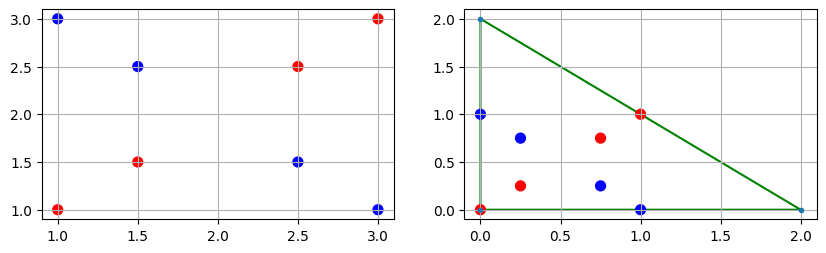

In [12]:
y_colors = ["r","r","r","r","b","b","b","b"]
plt.rcParams["figure.figsize"] = (10,6)
plt.subplot(2,2,1)
plt.scatter(X[:,0],X[:,1],c=y_colors,s=50)
plt.grid()
plt.subplot(2,2,2)
plt.plot(V(2)[:,0],V(2)[:,1],'.')
t1 = plt.Polygon(V(2),edgecolor="green",facecolor="none",linewidth=1.5)
plt.gca().add_patch(t1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_colors,s=50)
plt.grid()

In [13]:
bar_iterations=3
dim=2
dic_sups = dic_supports(supports(bar_iterations,dim))
sups = supports(bar_iterations,dim)
data = X_train
d=itek_barycentrics(data,bar_iterations)
bis = [bis_cons(d,ite,dim) for ite in range(bar_iterations+1)]

In [14]:
M(2)

array([[ 1. ,  0. ,  0. ],
       [-0.5,  0.5,  0. ],
       [-0.5,  0. ,  0.5]])

In [15]:
bis[0]

array([[1.   , 0.   , 0.   ],
       [0.75 , 0.125, 0.125],
       [0.25 , 0.375, 0.375],
       [0.   , 0.5  , 0.5  ],
       [0.5  , 0.   , 0.5  ],
       [0.5  , 0.125, 0.375],
       [0.5  , 0.375, 0.125],
       [0.5  , 0.5  , 0.   ]])

Training neural network...
1/1 [==============================] - 0s 157ms/step - loss: 0.6932 - accuracy: 0.2500
[0.6931540966033936, 0.25]
Training neural network...
1/1 [==============================] - 0s 122ms/step - loss: 0.2938 - accuracy: 1.0000
[0.29375213384628296, 1.0]
Training neural network...
1/1 [==============================] - 0s 120ms/step - loss: 0.0762 - accuracy: 1.0000
[0.07621800899505615, 1.0]


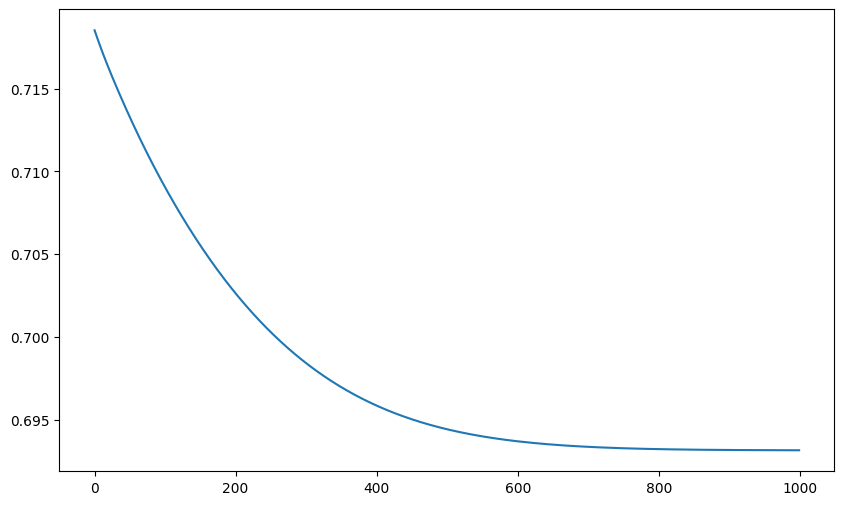

In [16]:
n_samples = len(X_train)

n_classes = len(set(y_train))
y_hot=tf.one_hot(y_train,depth=n_classes)
y_hot=np.array(y_hot)


verbose = False
epochs = 1000
model0,history0=SMNN(bis[0],y_train,epochs,verbose =verbose)
print(model0.evaluate(bis[0],y_hot))
plt.plot(history0.history['loss'])
#plt.show()
vsi = [bis_cons(itek_barycentrics(sups[i],i),i,dim) for i in range(bar_iterations)]
vs0 = np.matmul(vsi[0],model0.get_weights())
weights0=vs0 #np.matmul(P(2),model0.get_weights())#vs0


model1,history1=SMNN(bis[1],y_train,epochs,weights0,verbose =verbose)
print(model1.evaluate(bis[1],y_hot))

#plt.show()
vs1=np.matmul(vsi[1],model1.get_weights())
weights1=vs1

model2,history2=SMNN(bis[2],y_train,epochs,weights1,verbose =verbose)
print(model2.evaluate(bis[2],y_hot))

vs2=np.matmul(vsi[2],model2.get_weights())
weights2=vs2

#model3,history3=SMNN(bis[3],y_train,epochs,weights2,verbose =verbose)
#print(model3.evaluate(bis[3],y_hot))


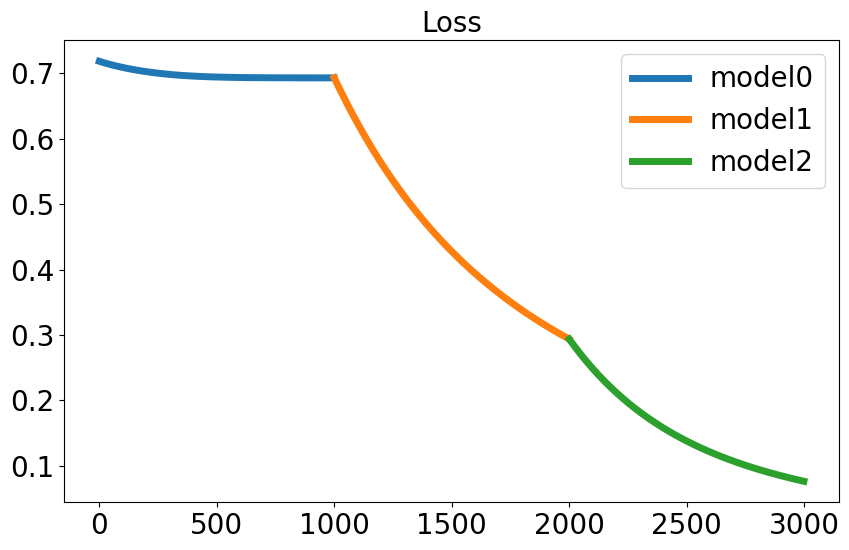

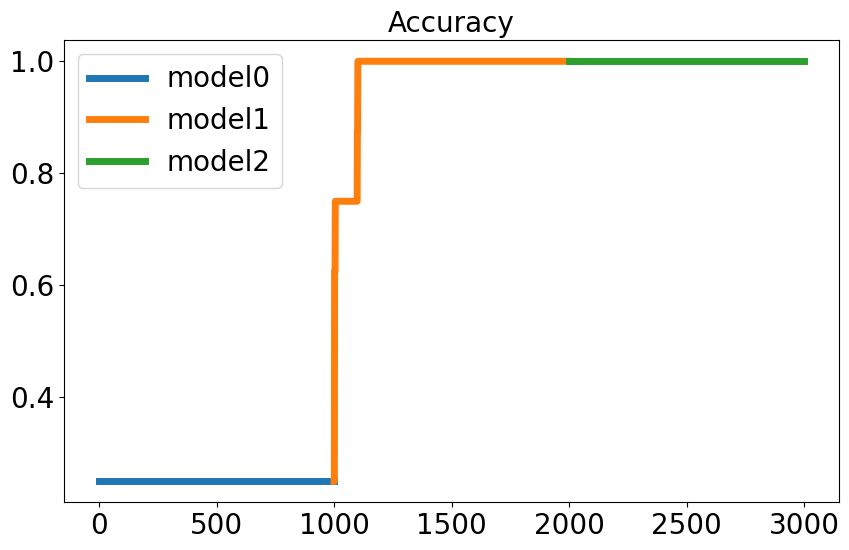

In [28]:

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

plt.plot(history0.history['loss'],linewidth=5)
plt.plot(range(epochs,2*epochs),history1.history['loss'],linewidth=5)
plt.plot(range(2*epochs,3*epochs),history2.history['loss'],linewidth=5)
#plt.plot(range(3*epochs,4*epochs),history3.history['loss'])
plt.legend(["model0","model1","model2","model3"],fontsize="20")
plt.title("Loss",fontsize="20")
plt.show()


plt.plot(history0.history['accuracy'],linewidth=5)
plt.plot(range(epochs,2*epochs),history1.history['accuracy'],linewidth=5)
plt.plot(range(2*epochs,3*epochs),history2.history['accuracy'],linewidth=5)
#plt.plot(range(3*epochs,4*epochs),history3.history['accuracy'])
plt.legend(["model0","model1","model2","model3"],fontsize="20")
plt.title("Accuracy",fontsize="20")
plt.show()


In [29]:
xs = np.linspace(0,2,500)
grid = []
for x in xs:
    for y in xs:
        if x+y<2:
            grid.append([x,y])
d_grid=itek_barycentrics(grid,bar_iterations)
bis_grid = [bis_cons(d_grid,ite,dim) for ite in range(bar_iterations+1)]

In [30]:
predicted_labels_0=[np.argmax(x) for x in model0.predict(bis_grid[0])]
predicted_labels_1=[np.argmax(x) for x in model1.predict(bis_grid[1])]
predicted_labels_2=[np.argmax(x) for x in model2.predict(bis_grid[2])]
#predicted_labels_3=[np.argmax(x) for x in model3.predict(bis_grid[3])]

3908/3908 [==============================] - 3s 775us/step


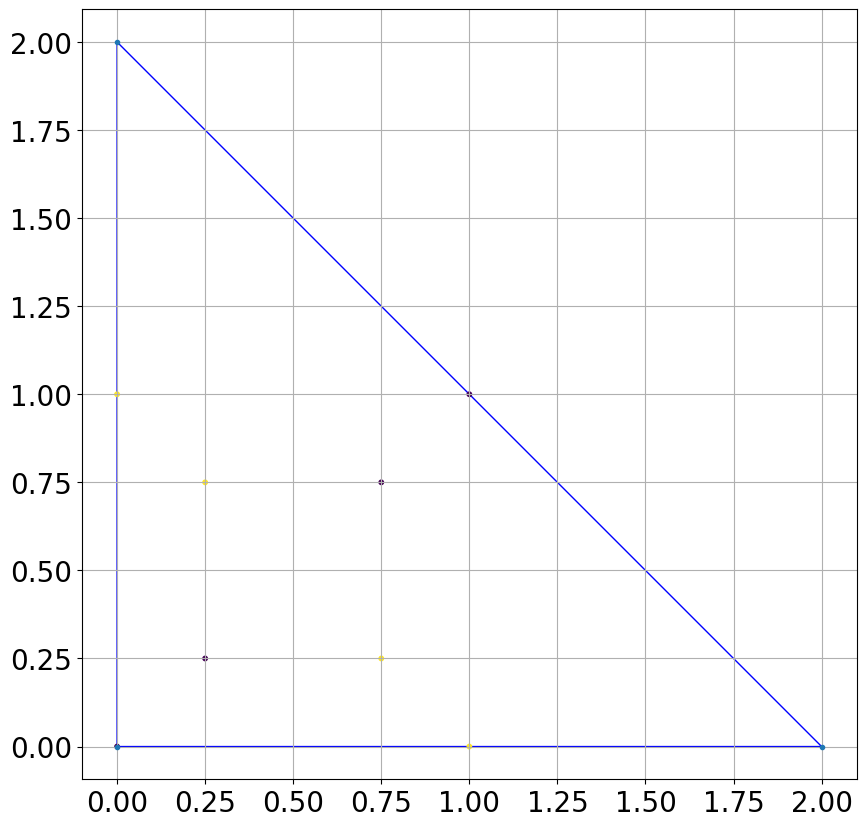

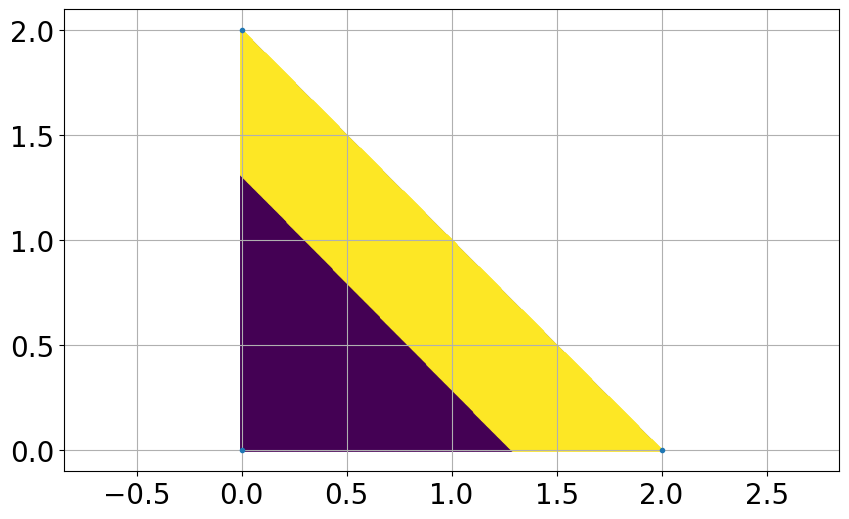

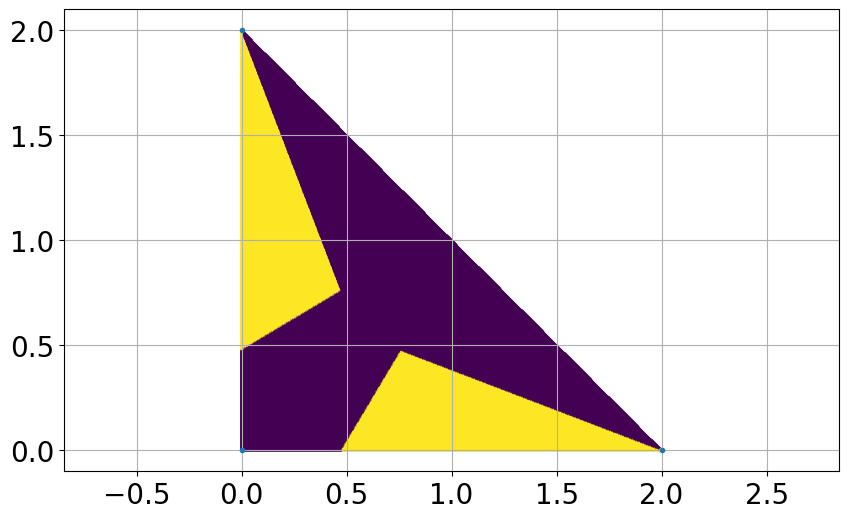

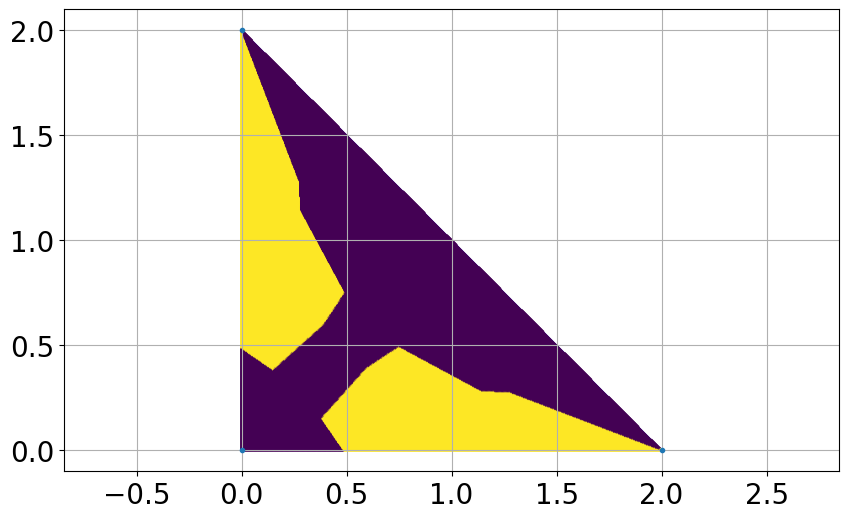

In [37]:
grid = np.array(grid)

plt.figure(figsize=(10,10))
plt.plot(V(2)[:,0],V(2)[:,1],'.')
t1 = plt.Polygon(V(2),edgecolor="blue",facecolor="none")
plt.gca().add_patch(t1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,s=10)
plt.grid()
plt.axis("equal")
plt.show()


plt.plot(V(2)[:,0],V(2)[:,1],'.')
t1 = plt.Polygon(V(2),edgecolor="blue",facecolor="none")
plt.gca().add_patch(t1)
plt.scatter(grid[:,0],grid[:,1],c=predicted_labels_0,s=1)
plt.grid()
plt.axis("equal")
plt.show()


plt.plot(V(2)[:,0],V(2)[:,1],'.')
t1 = plt.Polygon(V(2),edgecolor="blue",facecolor="none")
plt.gca().add_patch(t1)
plt.scatter(grid[:,0],grid[:,1],c=predicted_labels_1,s=1)
plt.grid()
plt.axis("equal")
plt.show()


plt.plot(V(2)[:,0],V(2)[:,1],'.')
t1 = plt.Polygon(V(2),edgecolor="blue",facecolor="none")
plt.gca().add_patch(t1)
plt.scatter(grid[:,0],grid[:,1],c=predicted_labels_2,s=1)
plt.grid()
plt.axis("equal")
plt.show()